## Decision Trees !!

> sklearn implementation of trees

- scikit-learn uses an optimized version of the **CART algorithm**; however, it does not support categorical variables for now

- Decision Trees are capable of finding complex nonlinear relationships in the data. They can perform both classification and regression tasks.
- In this section, we will demonstrate decision trees for regression task with California housing dataset and DecisionTreeRegressor class in sklearn.

Let's consider a simple dataset with two features: `age and income`, and the target variable is whether a person will buy a product or not. 

The decision tree algorithm might start by considering the age feature and find that splitting the data at age = 30 results in the most significant reduction in impurity (or uncertainty) regarding the target variable. The algorithm would then create two child nodes, one for age <= 30 and another for age > 30.But it is not random, the decision tree algorithm, iterates over every feature (in this case, income as well) and the possible splitting thresholds (age splitting factor can be something other than 30 or if income is selected as root then threshold could be income > 10 and income <10).

In the next step, the algorithm would recursively consider each child node and find the best feature(since we use age = 30 as our root node splitting threshold) we can now split the data further, perhaps using the income feature for one child node and creating new child nodes based on income levels. This process continues until the stopping criterion is met, and the leaf nodes represent the final predictions (e.g., "buy" or "not buy") for each region of the input space.

### When using scikit-learn's decision tree implementation `(DecisionTreeClassifier or DecisionTreeRegressor)`, some important hyperparameters include:
> (So let's say your data has 9 examples(rows of data) & root node divides the data 4 examples in age>30 and 5 examples in age age <=30)
> 
- `max_depth`: The maximum depth of the tree, limiting the number of levels in the decision tree. Setting a lower value can help prevent overfitting, but a higher value may be needed for complex problems.
- `min_samples_split`: The minimum number of instances required to split an internal node. A higher value can prevent overfitting and reduce the complexity of the tree. (if I set this parameter to 5 then the child node with examples corresponding to age>30(contains 4 values) won't split further)
- `min_samples_leaf`: The minimum number of instances required in a leaf node. A higher value can prevent overfitting and reduce the complexity of the tree. (Minimum number of examples required in a leaf node)
- `max_features`: The maximum number of features to consider when looking for the best split. For example, setting max_features='sqrt' will consider the square root of the total number of features at each split.
- `criterion`: The function used to measure the quality of a split, such as "gini" (for classification) or "squared_error" (for regression).

Classification API `sklearn.tree.DecisionTreeClassifier`

Regression API `sklearn.tree.DecisionTreeRegressor`

Both these estimators have the same set of parameters except for criterion used for tree splitting.

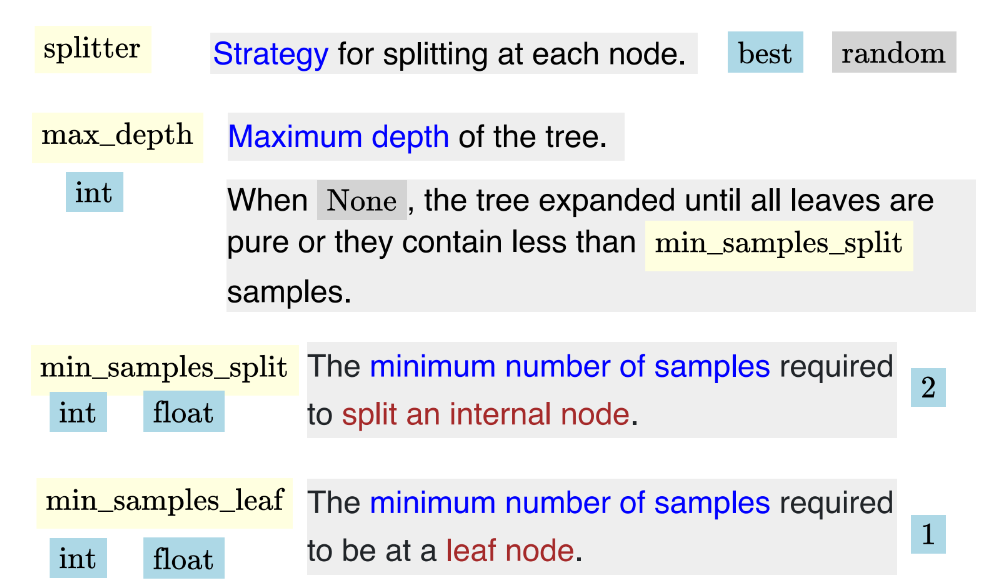
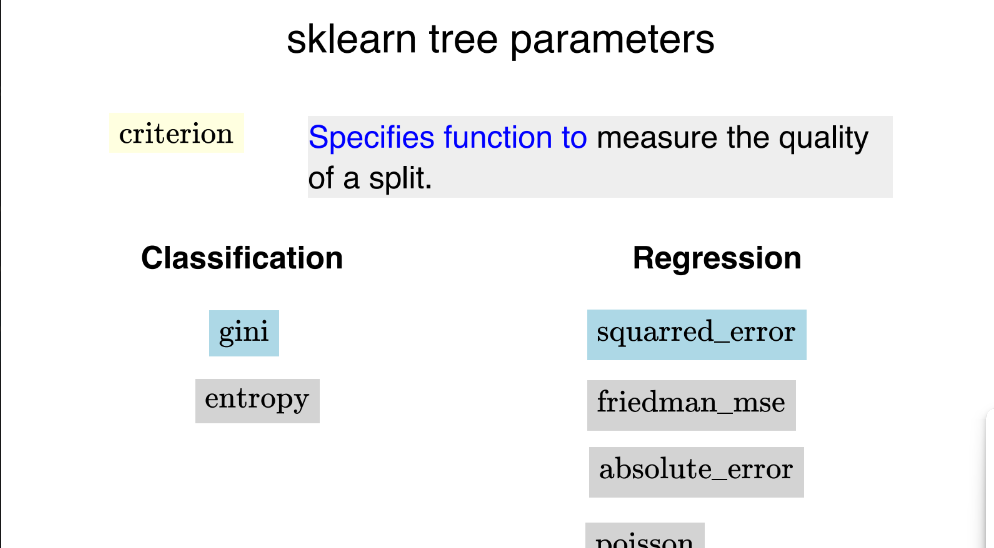
### The highlighted settings are default and are majorly used
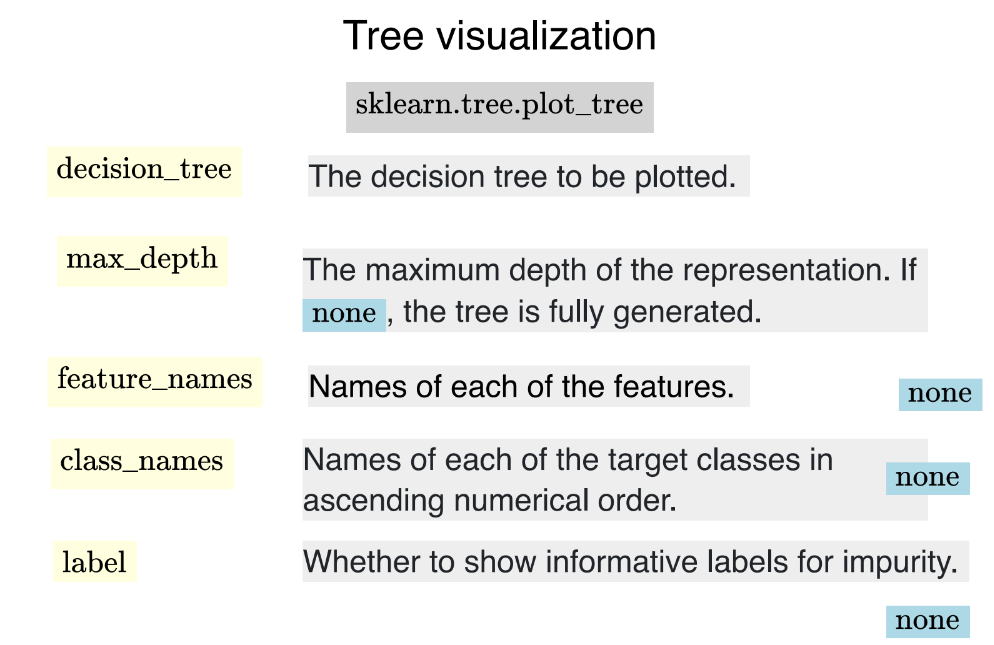
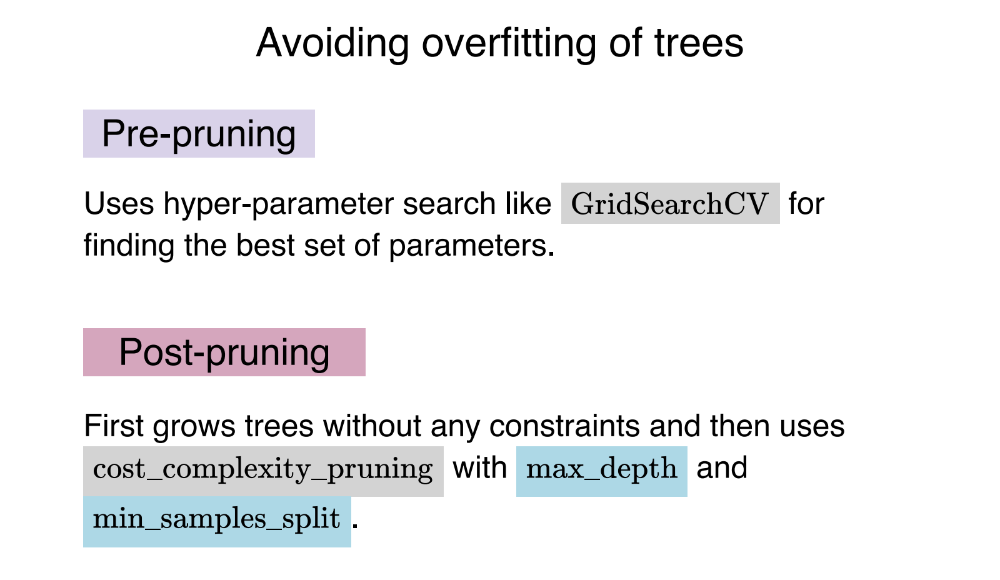
data.are dominant.ples.
None

min_samples_split


### Tips for practical usage

Decision trees tend to overfit data with a large number of features. Make sure that we have the right ratio of samples to number of features.
<br>
1. Perform dimensionality reduction (PCA, or Feature Selection) on a data before using it for training the trees.It gives a better chance of finding discriminative features.
2. Visualize the trained tree by using max_depth=3 as an initial tree depth to get a feel for the fitment and then increase the depth.
3. Balance the dataset before training to prevent the tree from being biased toward the classes that are dominant.
4. Use min_samples_split or min_samples_leaf to ensure that multiple samples influence every decision in the tree, by controlling which splits will be considered.
    - A very small number will usually mean the tree will overfit.
    - A large number will prevent the tree from learning the data.

### Decision Trees for Regression

### Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import export_text

In [2]:
np.random.seed(306)

Let's use `ShuffleSplit` as cv with 10 splits and 20% examples set aside as test examples.

In [3]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

### Loading the dataset

In [4]:
# fetch dataset
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

# train-test split
com_train_features, test_features, com_train_labels, test_labels = train_test_split(
    features, labels, random_state=42)

# train --> train + dev split
train_features, dev_features, train_labels, dev_labels = train_test_split(
    com_train_features, com_train_labels, random_state=42)

### Model Setup

In [5]:
dt_reg_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                             ("dt_reg", DecisionTreeRegressor(max_depth =3, random_state = 42))])
dt_reg_cv_results = cross_validate(dt_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

dt_reg_train_error = -1 * dt_reg_cv_results['train_score']
dt_reg_test_error = -1 * dt_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
      f"{dt_reg_train_error.mean():.3f} +/- {dt_reg_train_error.std():.3f}")
print(f"Mean absolute error of linear regression model on the test set:\n"
      f"{dt_reg_test_error.mean():.3f} +/- {dt_reg_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.590 +/- 0.005
Mean absolute error of linear regression model on the test set:
0.593 +/- 0.007


### Vizualising the Results

One of the advantages of using a decision tree classifier is that the output is intuitive to understand and can be easily visualised.

This can be done in two ways:

* As a tree diagram
* As a text based diagram


#### 1. As a tree diagram

We need to call `fit` function on `pipeline` object before printing the tree.

In [6]:
dt_reg_pipeline.fit(train_features, train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('dt_reg',
                 DecisionTreeRegressor(max_depth=3, random_state=42))])

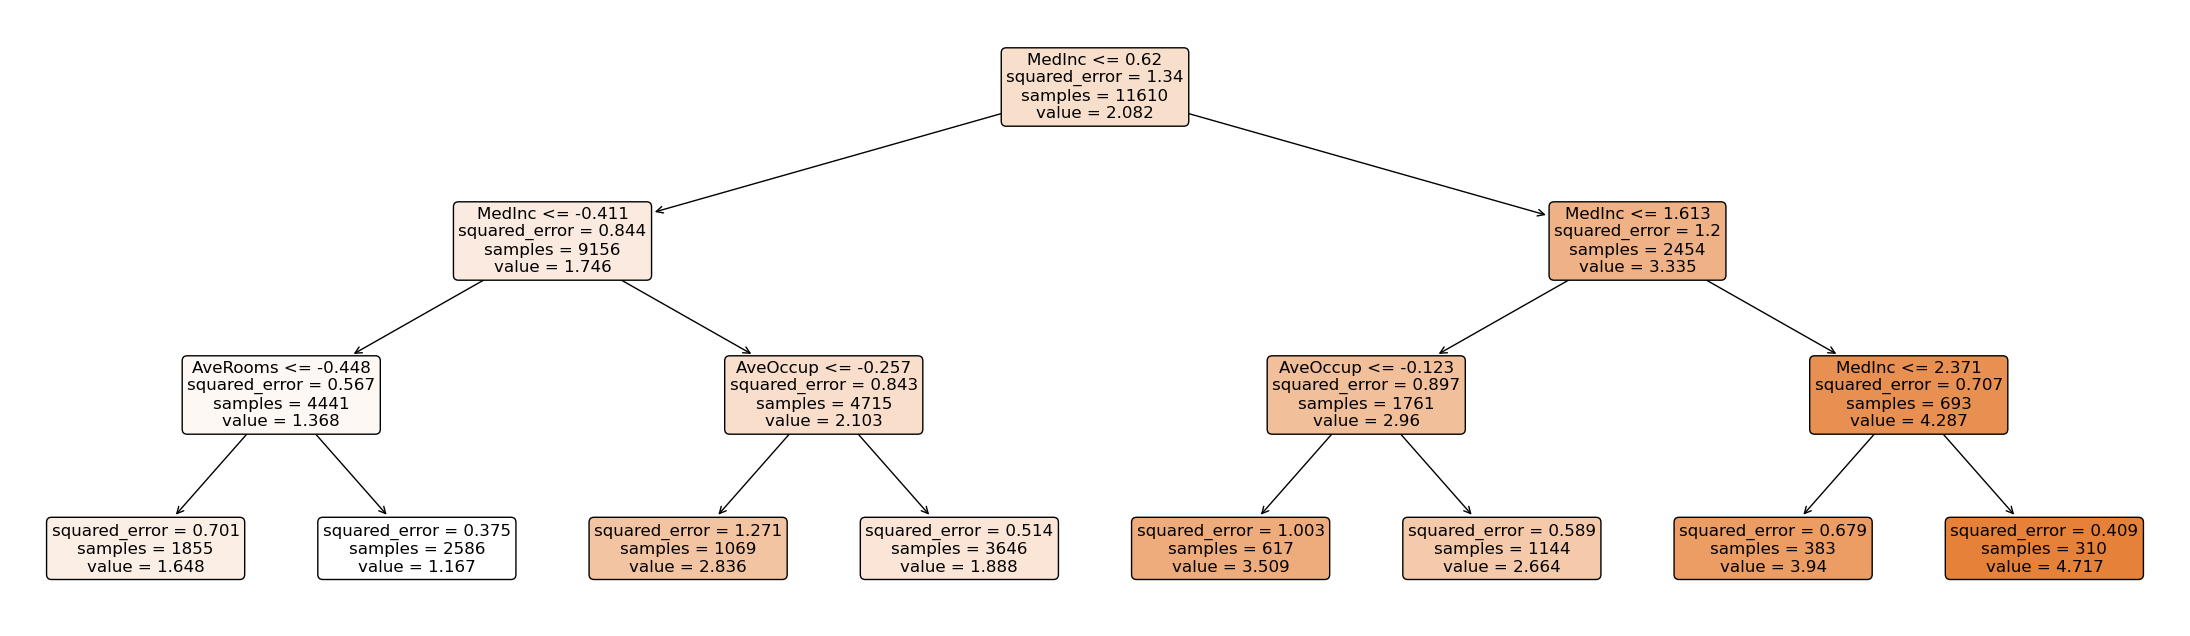

In [7]:
plt.figure(figsize=(28,8), facecolor ='w')
#create the tree plot
a = tree.plot_tree(dt_reg_pipeline[-1],
                   #use the feature names stored
                   feature_names = features.columns,
                   rounded = True,
                   filled = True,
                   fontsize=12)
#show the plot
plt.show()

#### 2. As a text-based diagram

In [8]:
#export the decision rules
tree_rules = export_text(dt_reg_pipeline[-1])
#print the result
print(tree_rules)

|--- feature_0 <= 0.62
|   |--- feature_0 <= -0.41
|   |   |--- feature_2 <= -0.45
|   |   |   |--- value: [1.65]
|   |   |--- feature_2 >  -0.45
|   |   |   |--- value: [1.17]
|   |--- feature_0 >  -0.41
|   |   |--- feature_5 <= -0.26
|   |   |   |--- value: [2.84]
|   |   |--- feature_5 >  -0.26
|   |   |   |--- value: [1.89]
|--- feature_0 >  0.62
|   |--- feature_0 <= 1.61
|   |   |--- feature_5 <= -0.12
|   |   |   |--- value: [3.51]
|   |   |--- feature_5 >  -0.12
|   |   |   |--- value: [2.66]
|   |--- feature_0 >  1.61
|   |   |--- feature_0 <= 2.37
|   |   |   |--- value: [3.94]
|   |   |--- feature_0 >  2.37
|   |   |   |--- value: [4.72]



### Using the tree for prediction

In [9]:
test_labels_pred = dt_reg_pipeline.predict(test_features)

### Evaluating the tree

In [10]:
mae = mean_absolute_error(test_labels, test_labels_pred)
mse = mean_squared_error(test_labels, test_labels_pred)
r2 = r2_score(test_labels, test_labels_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is ', mae)
print('MSE is ', mse)
print('R2 score is ',r2)

The model performance for testing set
--------------------------------------
MAE is  0.6005762942842664
MSE is  0.6417557936098145
R2 score is  0.5150037690483743


##### Hyperparameter Tuning

In [11]:
param_grid = {'dt_reg__max_depth': range(1, 20),
              'dt_reg__min_samples_split':range(2,8)}
dt_grid_search = GridSearchCV(dt_reg_pipeline,
                                 param_grid=param_grid,
                                 n_jobs=2,
                                 cv=cv,
                                 scoring="neg_mean_absolute_error",
                                 return_train_score=True)
dt_grid_search.fit(com_train_features, com_train_labels)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('feature_scaling', StandardScaler()),
                                       ('dt_reg',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=42))]),
             n_jobs=2,
             param_grid={'dt_reg__max_depth': range(1, 20),
                         'dt_reg__min_samples_split': range(2, 8)},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [12]:
mean_train_error = -1 * dt_grid_search.cv_results_['mean_train_score'][dt_grid_search.best_index_]
mean_test_error = -1 * dt_grid_search.cv_results_['mean_test_score'][dt_grid_search.best_index_]
std_train_error = dt_grid_search.cv_results_['std_train_score'][dt_grid_search.best_index_]
std_test_error = dt_grid_search.cv_results_['std_train_score'][dt_grid_search.best_index_]

print(f"Best Mean absolute error of decision tree regression model on the train set:\n"
      f"{mean_train_error:.3f} +/- {std_train_error:.3f}")
print(f"Mean absolute error of decision tree regression model on the test set:\n"
      f"{mean_test_error:.3f} +/- {std_test_error:.3f}")

Best Mean absolute error of decision tree regression model on the train set:
0.278 +/- 0.006
Mean absolute error of decision tree regression model on the test set:
0.428 +/- 0.006


In [13]:
print ("Mean cross validated score of the best estimator is: ", -1*dt_grid_search.best_score_)

Mean cross validated score of the best estimator is:  0.4283313044233501


In [14]:
print ("The best parameter value is:", dt_grid_search.best_params_)

The best parameter value is: {'dt_reg__max_depth': 11, 'dt_reg__min_samples_split': 5}


Let's Retrain the model with best parameters :

In [15]:
dt_reg_pipeline.set_params(
    dt_reg__max_depth=11, dt_reg__min_samples_split=5).fit(
        com_train_features, com_train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('dt_reg',
                 DecisionTreeRegressor(max_depth=11, min_samples_split=5,
                                       random_state=42))])

In [16]:
test_labels_pred = dt_reg_pipeline.predict(test_features)
mae = mean_absolute_error(test_labels, test_labels_pred)
mse = mean_squared_error(test_labels, test_labels_pred)
r2 = r2_score(test_labels, test_labels_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is ', mae)
print('MSE is ', mse)
print('R2 score is ',r2)

The model performance for testing set
--------------------------------------
MAE is  0.4248952183820017
MSE is  0.4154957726373763
R2 score is  0.6859960039130073


## Classification 

# Decision Trees using Pipelines

- Abalone is a type of consumable snail whose price varies as per its age.
- The aim is to predict the age of abalone from physical measurements.
-  The age of abalone is traditionally determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope — a boring and time-consuming task.
-   Other measurements, which are easier to obtain, are used to predict the age.

In [17]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None, names=column_names)

Let’s now see the type and name of the features:

* **Sex:** This is the gender of the abalone and has categorical value (M, F or I).
* **Length:** The longest measurement of the abalone shell in mm. Continuous numeric value.
* **Diameter:** The measurement of the abalone shell perpendicular to length in mm. Continuous numeric value.
* **Height:** Height of the shell in mm. Continuous numeric value.
Whole Weight : Weight of the abalone in grams. Continuous numeric value.
* **Shucked Weight:** Weight of just the meat in the abalone in grams. Continuous numeric value.
* **Viscera Weight:** Weight of the abalone after bleeding in grams. Continuous numeric value.
* **Shell Weight:** Weight of the abalone after being dried in grams. Continuous numeric value.
* **Rings:** This is the target, that is the feature that we will train the model to predict. As mentioned earlier, we are interested in the age of the abalone and it has been established that number of rings + 1.5 gives the age. Discrete numeric value.

In [18]:
type(abalone_data)

pandas.core.frame.DataFrame

#### EDA

In [19]:
abalone_data.shape

(4177, 9)

In [20]:
abalone_data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


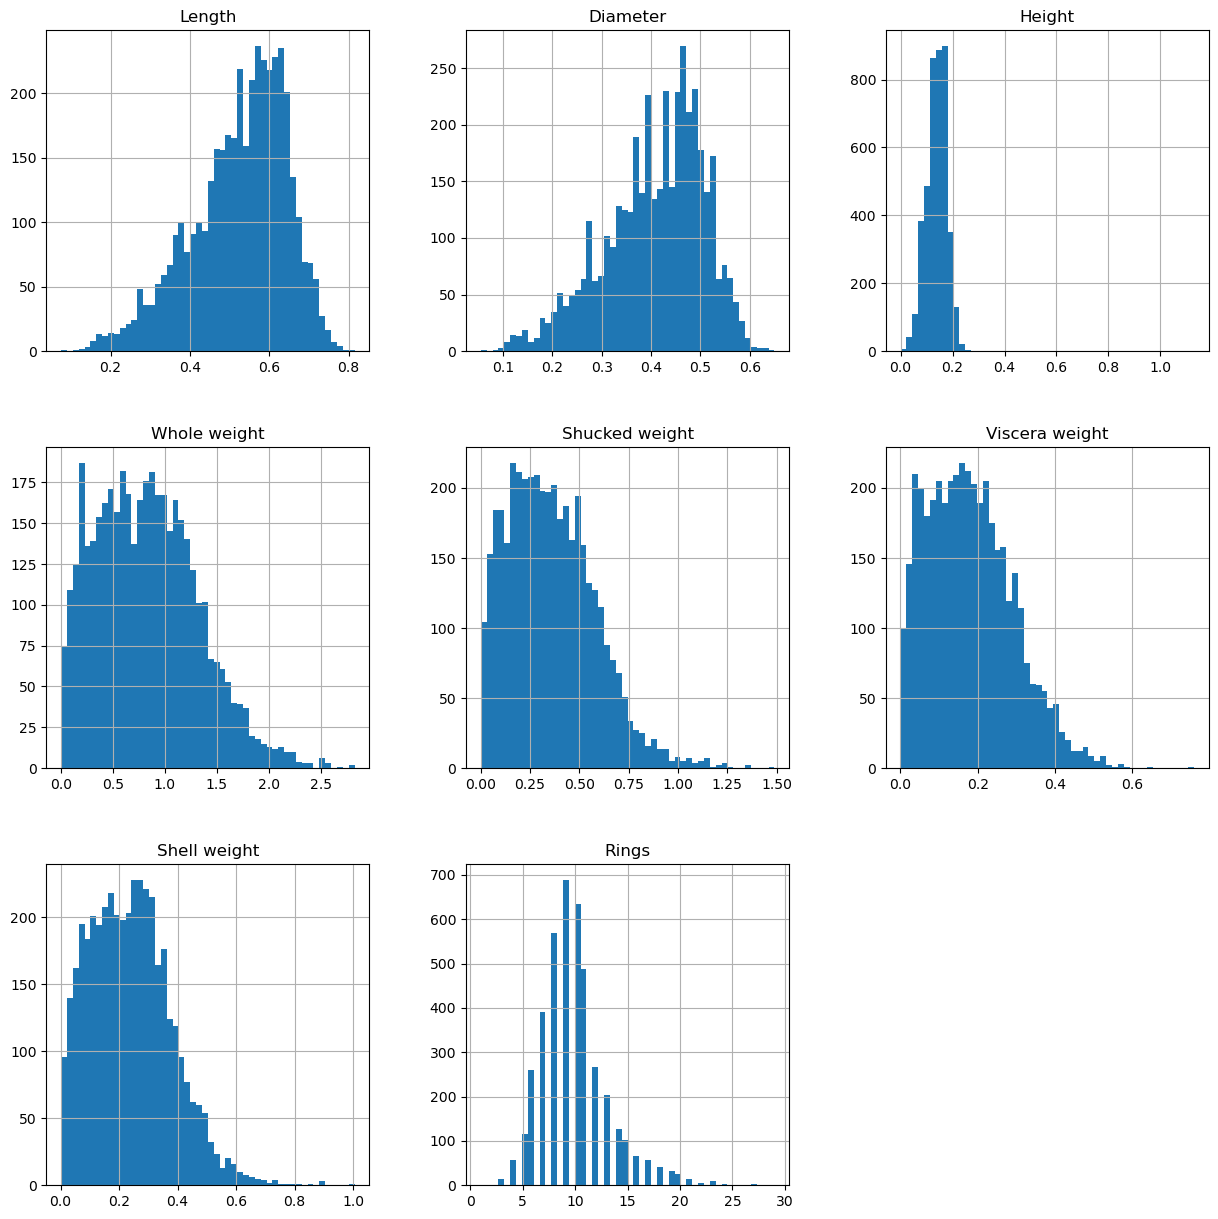

In [21]:
abalone_data.hist(bins=50,figsize=(15,15))
# display histogram
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 640x480 with 0 Axes>

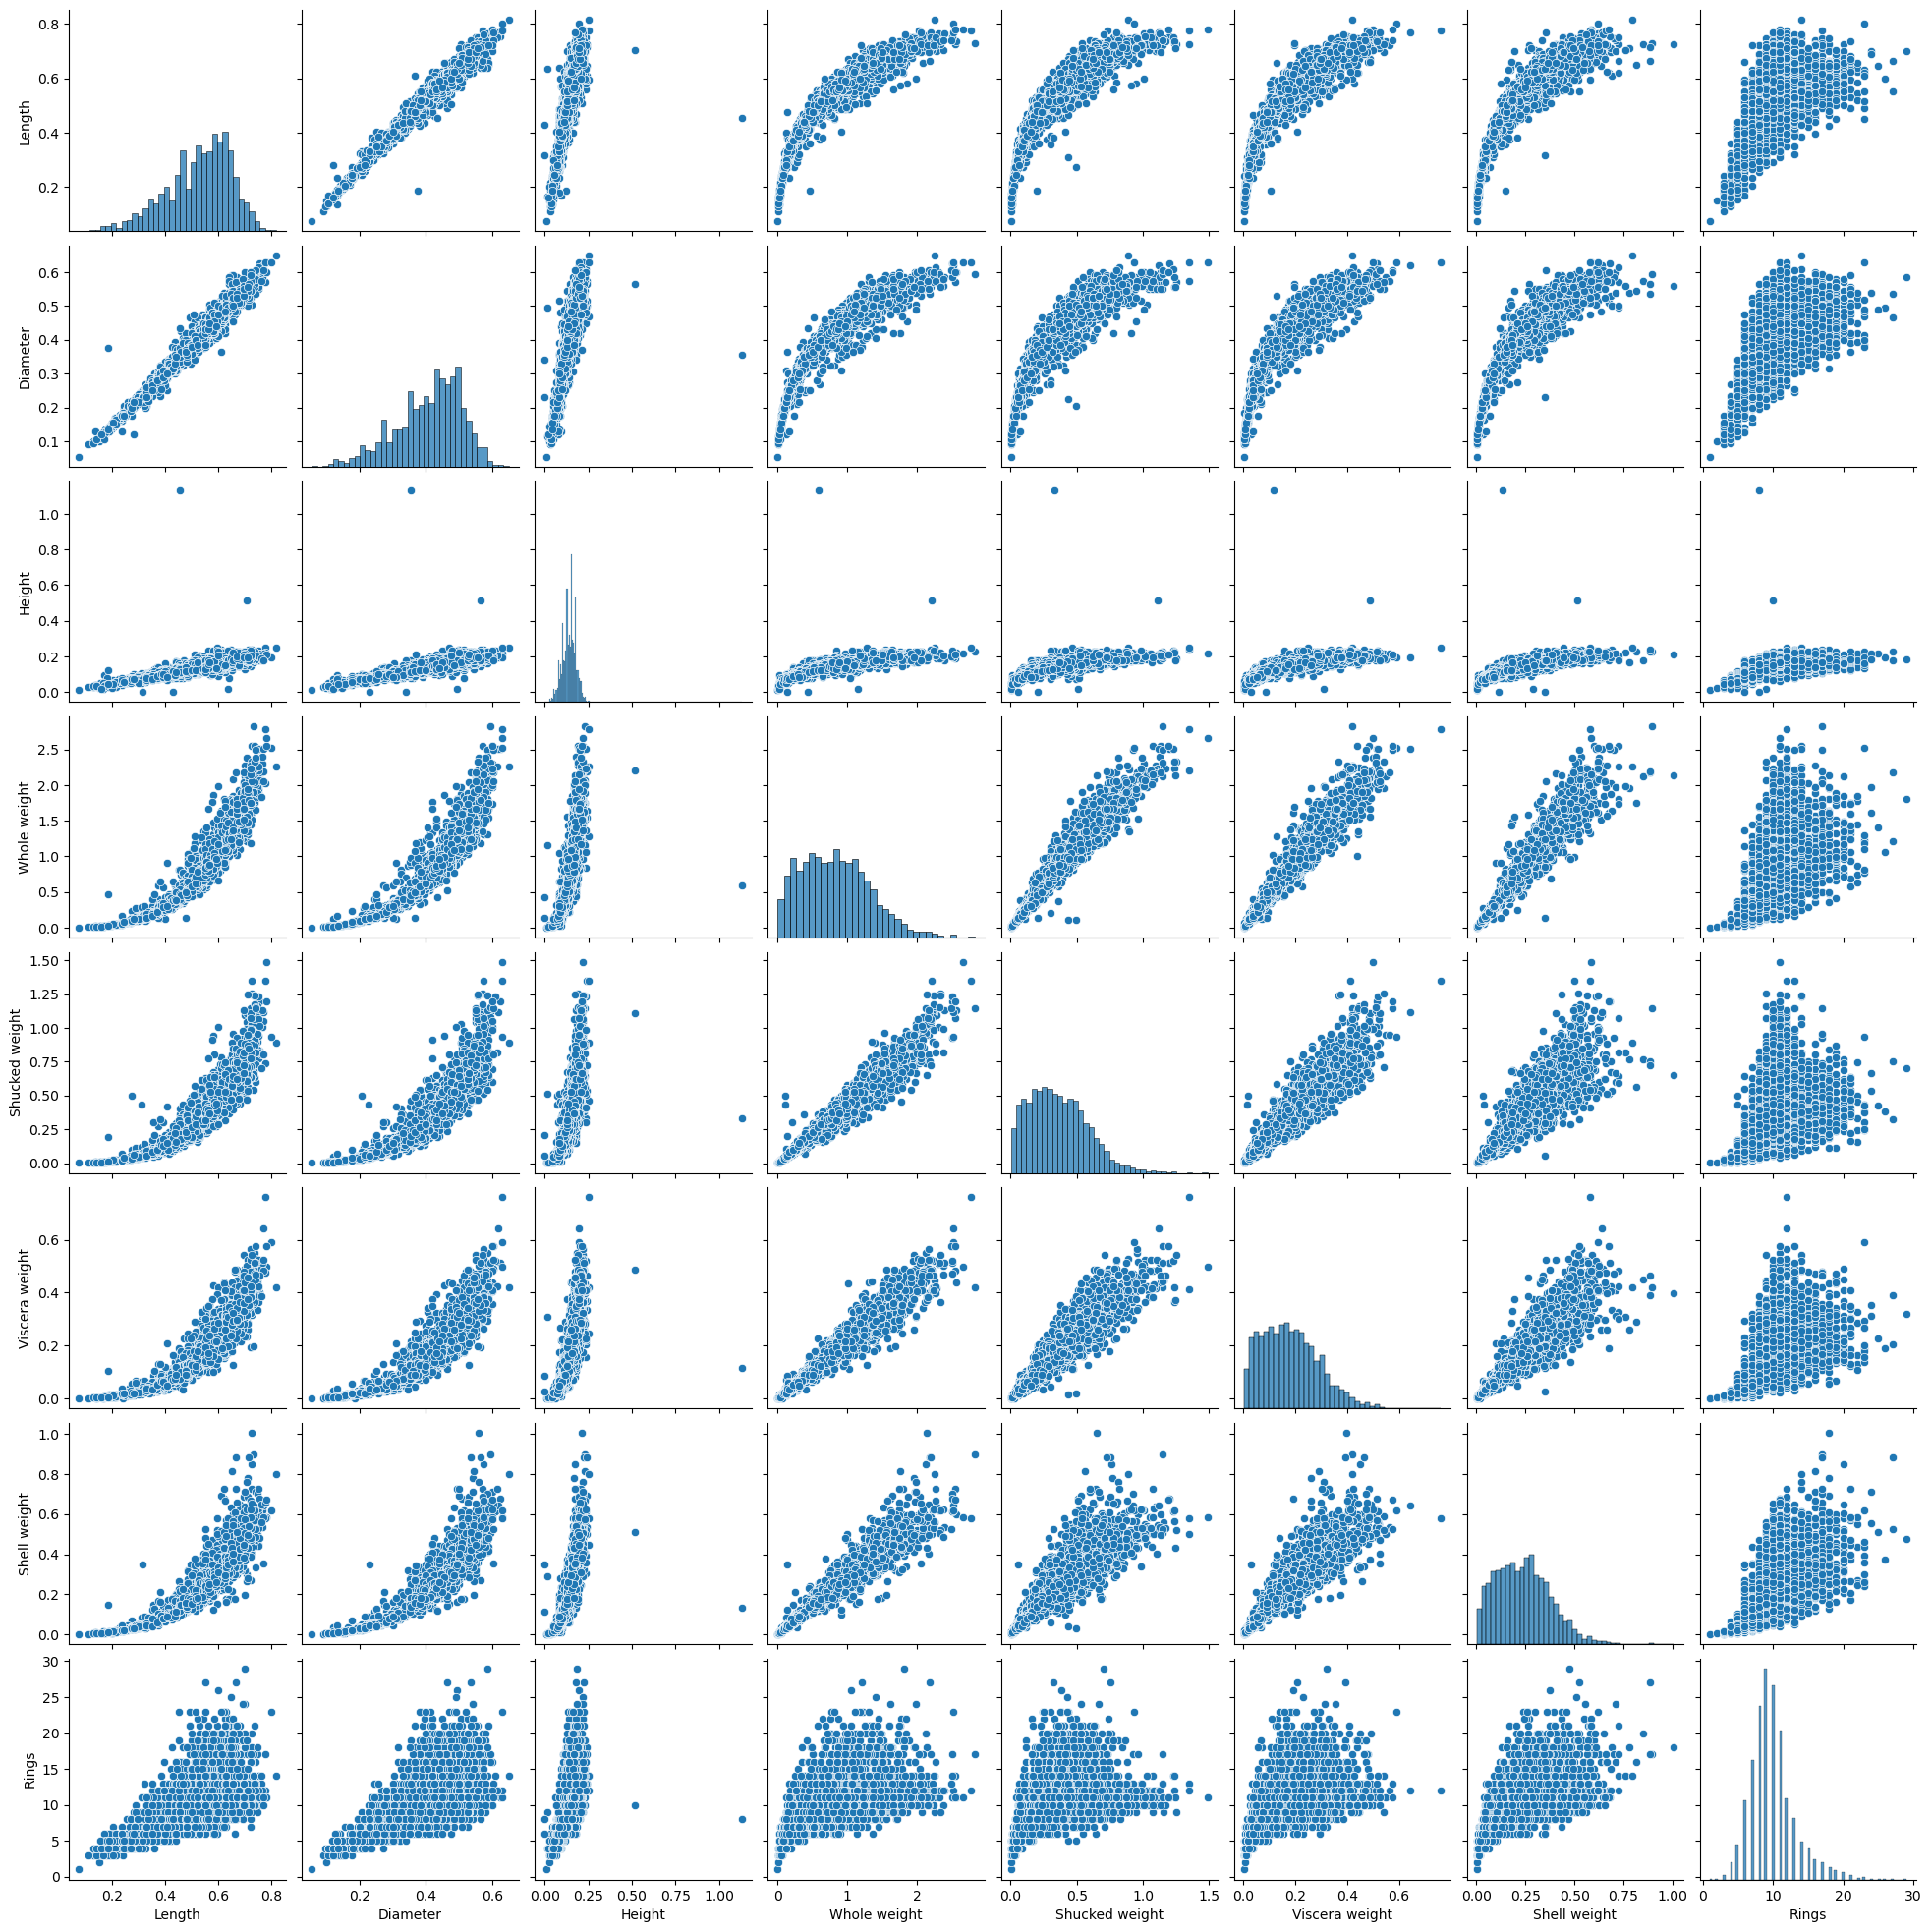

In [22]:
plt.figure()
sns.pairplot(abalone_data, diag_kind="hist")
plt.show()

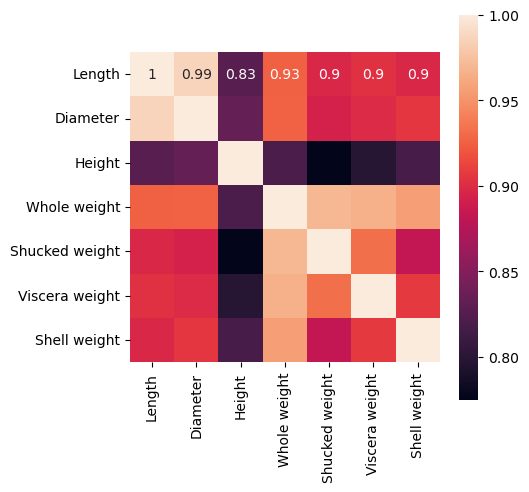

In [40]:
plt.figure(figsize= (5,5))
sns.heatmap(abalone_data.iloc[:,1:-1].corr(), annot=True,square = True)
plt.show()

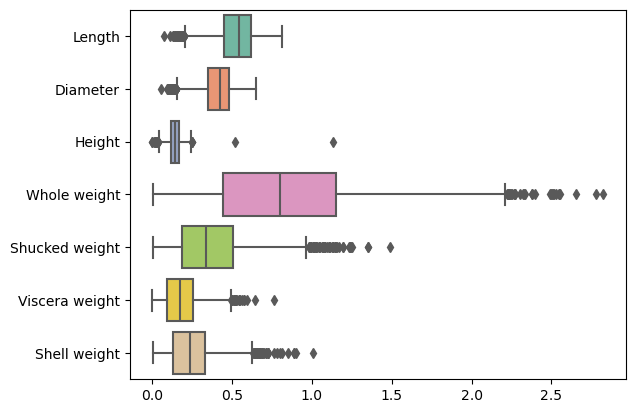

In [35]:
plt.figure()
sns.boxplot(data=abalone_data.iloc[:,:-1], orient="h", palette="Set2")
plt.show()

We find different features to be having different ranges through this box-plot, which indicates that scaling the features may be useful.

In [41]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [42]:
## From the information above, all features are continuous variables except for the Sex feature.

abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


The count row shows that there are no missing values.

However, in the Height feature, the minimum value is zero. This possibility calls for a missing value in the data and we will process the missing value.

Next, take a look at the target in this case in the Rings column

In [43]:
abalone_data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [44]:
abalone_data['Rings'].value_counts().sort_index()

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64

> We can see that the target is 1 to 29 (but there is no 28), so the classification we are going to do is a multi-class classification.


### Missing values (or 0 values)

We first check how many missing values are in the Height feature and which class is it in.


In [45]:
(abalone_data['Height'] == 0).sum()

2

In [46]:
abalone_data[abalone_data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


The number of missing values is 2 and is in the infant sex. Then we change the value 0 to null. We will fill in the missing value with the average Height feature for the infant gender

In [47]:
means = pd.pivot_table(abalone_data, index = ['Sex'], aggfunc = {'Height':np.mean})
means

C:\Users\rahul gupta\AppData\Local\Temp\ipykernel_19988\3873427106.py:1: FutureWarning: The provided callable <function mean at 0x0000020F6C925F80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  means = pd.pivot_table(abalone_data, index = ['Sex'], aggfunc = {'Height':np.mean})


,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


So we will fill in the missing value with 0.107996. (Will do this in a little while during preprocessing)

### Storing data in the form of X and y

In [48]:
X = abalone_data.iloc[:, :-1]
y = abalone_data.iloc[:, -1]

In [49]:
X[:5]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


### Splitting data into train and test sets

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

## Pipelining

We will use pipelines to perform preprocessing of the data, which will include: handling missing (or 0) values, scaling the features and handling the categorical feature (viz., sex in this case)

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

Identifying numeric and categorical features (to be able to preprocess them differently.)

In [53]:
numeric_features = ['Length', 'Diameter',	'Height',	'Whole weight',	'Shucked weight',	'Viscera weight',	'Shell weight']
categorical_features = ["Sex"]


In [54]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(missing_values = 0, strategy="constant", fill_value = 0.107996)),
           ("scaler", StandardScaler())]
)


In [55]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [57]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [58]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", DecisionTreeClassifier(
               max_depth =3, random_state = 42))]
)

In [59]:
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.245


In [60]:
y_pred = clf.predict(X_test)

Let us compare the actual and predicted values of y.

In [61]:
comparison = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1)

for each in comparison:
  print(each)

[10 13]
[8 8]
[10 11]
[4 5]
[10 12]
[10 11]
[9 7]
[8 8]
[7 7]
[10  9]
[7 8]
[5 8]
[ 9 11]
[8 9]
[5 4]
[10  7]
[9 7]
[10 17]
[10  7]
[7 7]
[7 7]
[7 5]
[8 8]
[9 9]
[10 10]
[10 10]
[4 5]
[11 15]
[ 8 10]
[10 14]
[9 8]
[4 4]
[10  9]
[11 13]
[7 7]
[8 7]
[7 8]
[10  9]
[7 8]
[10 11]
[ 8 15]
[ 8 12]
[ 8 17]
[10 16]
[10 11]
[ 8 11]
[9 8]
[10 10]
[10 11]
[7 6]
[10 13]
[7 7]
[ 9 13]
[11 20]
[ 8 12]
[9 7]
[5 8]
[ 9 10]
[7 7]
[7 7]
[10  9]
[9 9]
[ 9 11]
[7 8]
[7 7]
[11 12]
[11 13]
[10 17]
[8 8]
[11 12]
[8 9]
[11 17]
[10 10]
[8 6]
[ 8 11]
[8 8]
[10  8]
[8 9]
[10  8]
[8 8]
[10  8]
[5 6]
[7 7]
[10 13]
[ 8 11]
[7 6]
[10  9]
[11 12]
[4 5]
[7 6]
[ 9 11]
[ 8 11]
[9 8]
[7 7]
[10 16]
[5 8]
[ 8 11]
[9 8]
[10 18]
[10 11]
[10 12]
[ 8 14]
[10 12]
[10 11]
[5 6]
[10  9]
[7 7]
[7 6]
[ 7 11]
[10 11]
[11 11]
[11 12]
[ 8 20]
[ 9 10]
[10 14]
[11 10]
[10 10]
[10 12]
[5 4]
[ 8 12]
[7 7]
[10 13]
[7 6]
[8 8]
[10 17]
[10 15]
[10  9]
[10 11]
[7 7]
[10 11]
[10  8]
[9 7]
[8 7]
[10 10]
[11 11]
[10  9]
[ 8 10]
[8 9]
[7 8]
[11 16

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix \n', cm)

Confusion matrix 
 [[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7 14  0 10  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 12  0 28  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3  0 56 13 22  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0 25 43 28 13  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7 47 24 47  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 22 17 49 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 20 14 45 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 17  3 30 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  8  2 18 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 12  0 11  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  1  8  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4  0  5  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  

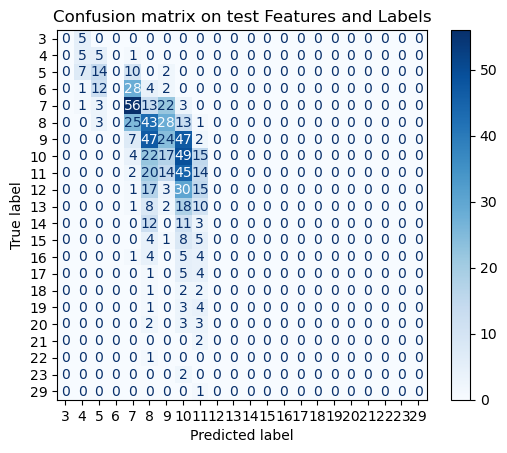

In [67]:
# visualizing the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix on test Features and Labels')
plt.show()

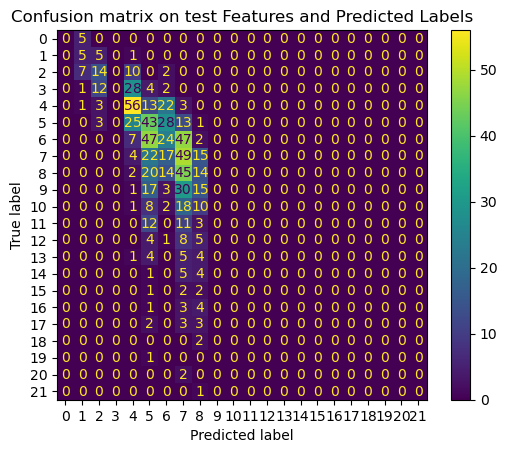

In [69]:
# visualizing the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_predicted = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_predicted)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion matrix on test Features and Predicted Labels')
plt.show()

In [70]:
from sklearn.metrics import classification_report

CR = classification_report(y_test, y_pred)
print('Classification report \n')
print(CR)

Classification report 

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.26      0.45      0.33        11
           5       0.38      0.42      0.40        33
           6       0.00      0.00      0.00        47
           7       0.41      0.57      0.48        98
           8       0.21      0.38      0.27       113
           9       0.21      0.19      0.20       127
          10       0.20      0.46      0.28       107
          11       0.16      0.15      0.16        95
          12       0.00      0.00      0.00        66
          13       0.00      0.00      0.00        39
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        14
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         8
   

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Cross-Validation

In [71]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print(type(acc))
print('Accuracy of each fold ', list(acc*100))
print("Accuracy: {:.2f} %".format(acc.mean()*100))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


<class 'numpy.ndarray'>
Accuracy of each fold  [27.46268656716418, 22.45508982035928, 23.952095808383234, 24.550898203592812, 24.251497005988025, 23.952095808383234, 25.449101796407188, 30.83832335329341, 26.34730538922156, 26.047904191616766]
Accuracy: 25.53 %


### Visualizing the decision tree

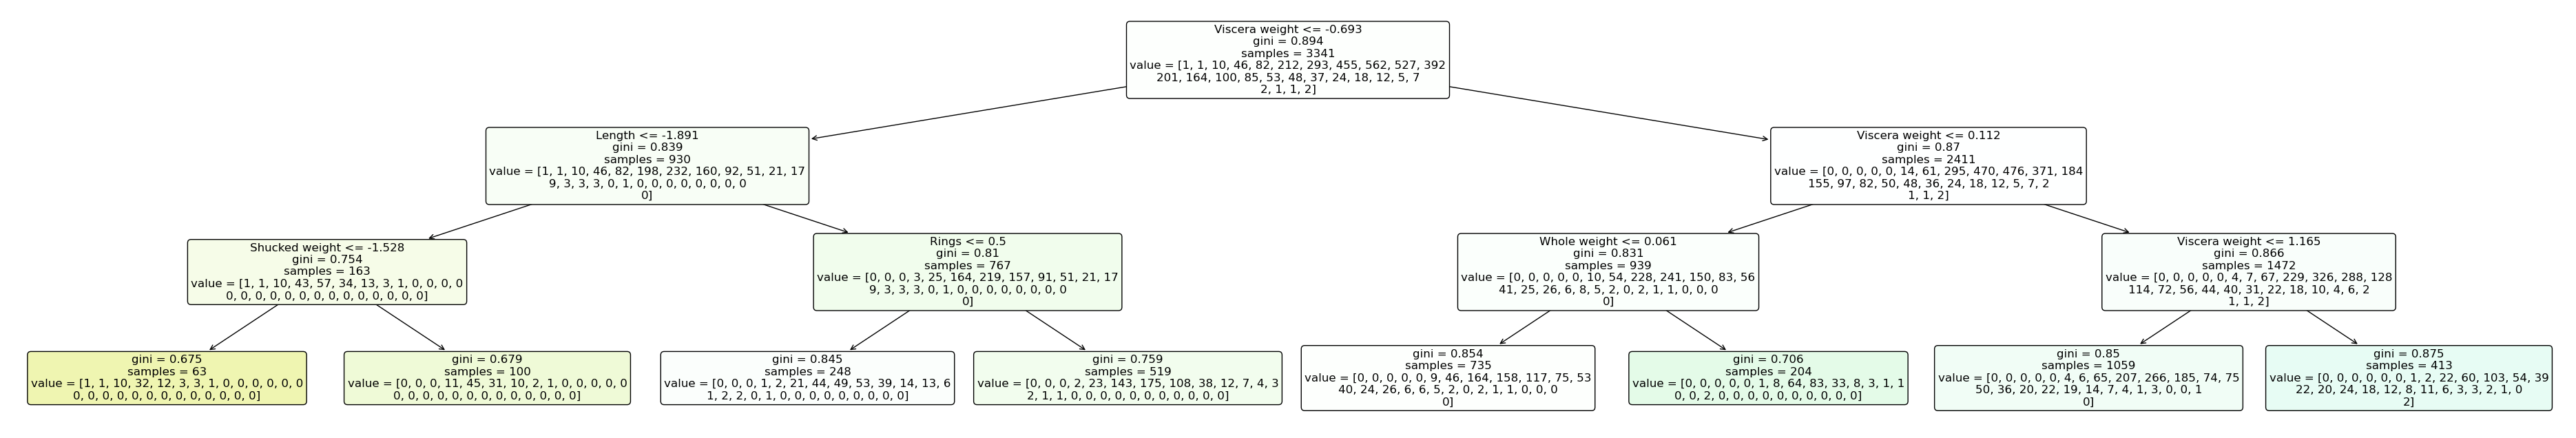

In [73]:
from sklearn import tree

#plt the figure, setting a black background
plt.figure(figsize=(48,8), facecolor ='w')

#create the tree plot
a = tree.plot_tree(clf['classifier'],
                   #use the feature names stored
                   feature_names = column_names,
                   rounded = True,
                   filled = True,
                   fontsize=12)
#show the plot
plt.show()

### #Finding the best parameters using GridSearchCV

In [74]:
X_train_new = preprocessor.fit_transform(X_train)

In [75]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'max_depth': [1,2,3,4,5,6,7,8,9],
                     'min_samples_split': [2,4,6,8,10]}]
scores = ['recall']
for score in scores:

    print()
    print(f"Tuning hyperparameters for {score}")
    print()

    clf_CV = GridSearchCV(DecisionTreeClassifier(),
                          tuned_parameters,
                          scoring = f'{score}_macro')

    clf_CV.fit(X_train_new, y_train)

    print("Best parameters:")
    print()
    print(clf_CV.best_params_)
    print()
    print("Grid scores:")
    means = clf_CV.cv_results_["mean_test_score"]
    stds = clf_CV.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,
                                 clf_CV.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")



Tuning hyperparameters for recall



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to co

Best parameters:

{'max_depth': 5, 'min_samples_split': 4}

Grid scores:
0.073 (+/-0.009) for {'max_depth': 1, 'min_samples_split': 2}
0.073 (+/-0.009) for {'max_depth': 1, 'min_samples_split': 4}
0.073 (+/-0.009) for {'max_depth': 1, 'min_samples_split': 6}
0.073 (+/-0.009) for {'max_depth': 1, 'min_samples_split': 8}
0.073 (+/-0.009) for {'max_depth': 1, 'min_samples_split': 10}
0.107 (+/-0.011) for {'max_depth': 2, 'min_samples_split': 2}
0.107 (+/-0.011) for {'max_depth': 2, 'min_samples_split': 4}
0.107 (+/-0.011) for {'max_depth': 2, 'min_samples_split': 6}
0.107 (+/-0.011) for {'max_depth': 2, 'min_samples_split': 8}
0.107 (+/-0.011) for {'max_depth': 2, 'min_samples_split': 10}
0.131 (+/-0.012) for {'max_depth': 3, 'min_samples_split': 2}
0.131 (+/-0.012) for {'max_depth': 3, 'min_samples_split': 4}
0.131 (+/-0.012) for {'max_depth': 3, 'min_samples_split': 6}
0.131 (+/-0.012) for {'max_depth': 3, 'min_samples_split': 8}
0.131 (+/-0.012) for {'max_depth': 3, 'min_samples_split'

> Let us now create a new pipeline using the best features identified above.

In [76]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf2 = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", DecisionTreeClassifier(
               max_depth =5, min_samples_split = 4, random_state = 42))]
)

In [77]:
clf2.fit(X_train, y_train)
print("model score: %.3f" % clf2.score(X_test, y_test))

model score: 0.272


> #### We observe an improvement in the model score!

# Decision Trees for Classification

In this half of the notebook, we will demonstrate decision trees for classification task with Iris dataset and DecisionTreeClassifier class in sklearn.

Let's load Iris dataset with load_irisAPI

In [78]:
from sklearn.datasets import load_iris
features, labels = load_iris(return_X_y=True, as_frame=True)

Let's split the data into train and test

In [79]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42)

Define the decision tree classifier as part of pipeline.

In [80]:
from sklearn.preprocessing import MinMaxScaler

dt_pipeline = Pipeline([('scaler', MinMaxScaler()),
                        ('dt_classifier', DecisionTreeClassifier(max_depth=3,random_state=42))])

Training the classifier.

In [81]:
dt_pipeline.fit(train_features, train_labels)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dt_classifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

Now that the classifier is trained, let's evaluate it on the test set with :

- Confusion matrix

- Classification report

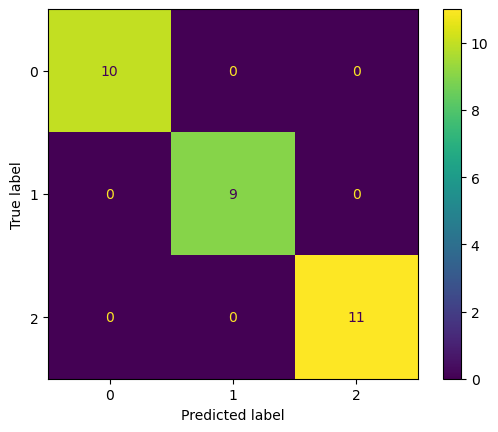

In [82]:
ConfusionMatrixDisplay.from_estimator(dt_pipeline, test_features, test_labels)
plt.show()

In [83]:
print(classification_report(test_labels, dt_pipeline.predict(test_features)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Let's Visualize the tree

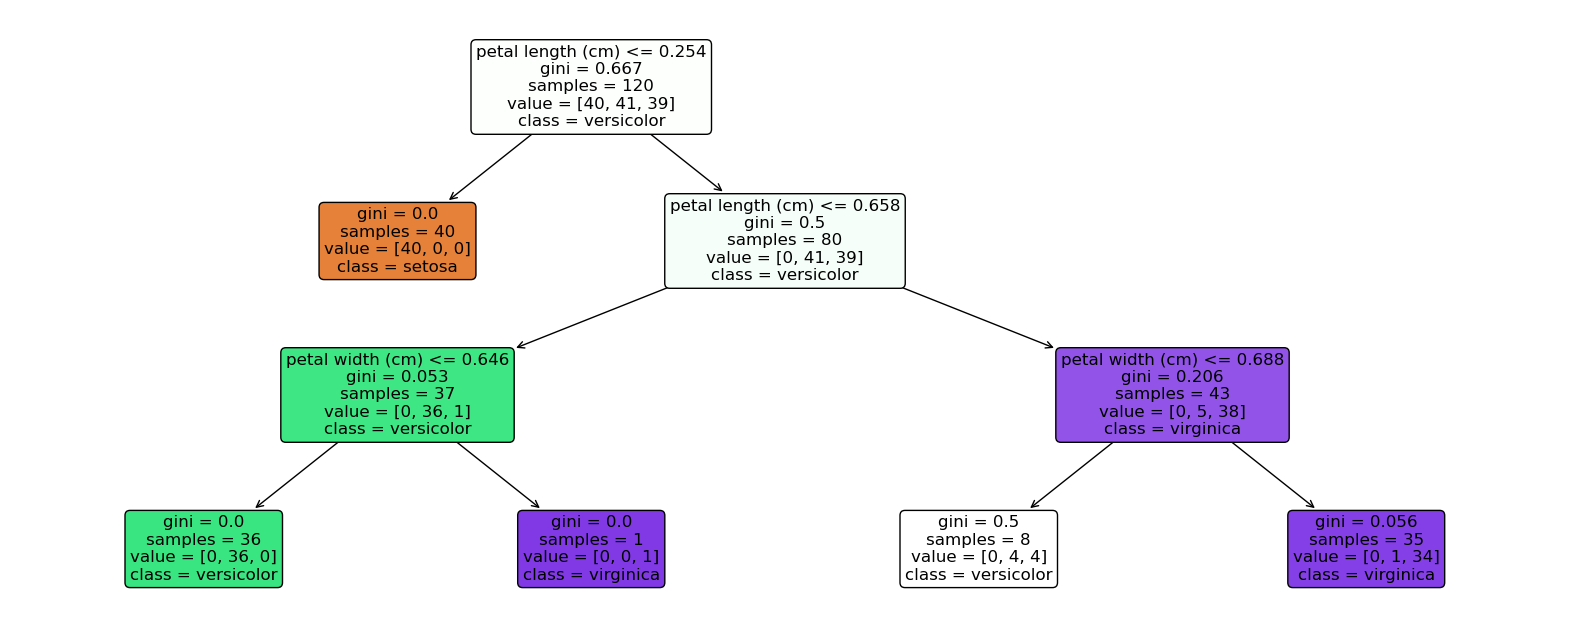

In [84]:
plt.figure(figsize=(20, 8))

a = tree.plot_tree(dt_pipeline[-1],
                   #use the feature names stored
                   feature_names=features.columns,
                   #use the class names stored
                   class_names=load_iris().target_names,
                   rounded=True,
                   filled=True,
                   fontsize=12)

plt.show()

Let's convert this tree representation into if-else rule set.

In [85]:
#export the decision rules
tree_rules = export_text(dt_pipeline[-1], feature_names=list(features.columns))

print(tree_rules)

|--- petal length (cm) <= 0.25
|   |--- class: 0
|--- petal length (cm) >  0.25
|   |--- petal length (cm) <= 0.66
|   |   |--- petal width (cm) <= 0.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  0.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  0.66
|   |   |--- petal width (cm) <= 0.69
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  0.69
|   |   |   |--- class: 2



Let's get the feature importance from the trained decision tree model.

In [86]:
importance = pd.DataFrame({'features': features.columns,
                           'importance': np.round(dt_pipeline[-1].feature_importances_, 4)})

importance.sort_values('importance', ascending=False, inplace=True)
print(importance)

            features  importance
2  petal length (cm)      0.9346
3   petal width (cm)      0.0654
0  sepal length (cm)      0.0000
1   sepal width (cm)      0.0000


### Now, perform HPT using GridSearchCV :

There are two configurable parameters in the tree classifier :

- max_depth

- min_samples_split

In [87]:
param_grid = [{'dt_classifier__max_depth': [1, 2, 3, 4, 5],
            'dt_classifier__min_samples_split': [2, 4, 6, 8, 10]}]

gs_clf = GridSearchCV(dt_pipeline, param_grid, scoring='f1_macro')
gs_clf.fit(train_features, train_labels)

print('Best parameters : ', gs_clf.best_params_)
print()

print('Grid scores are as follows : \n')
means = gs_clf.cv_results_['mean_test_score']
stds = gs_clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, gs_clf.cv_results_['params']):
  print(f'{mean:0.3f} (+/-) {std*2:0.03f} for {params}\n')

Best parameters :  {'dt_classifier__max_depth': 4, 'dt_classifier__min_samples_split': 2}

Grid scores are as follows : 

0.559 (+/-) 0.014 for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 2}

0.559 (+/-) 0.014 for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 4}

0.559 (+/-) 0.014 for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 6}

0.559 (+/-) 0.014 for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 8}

0.559 (+/-) 0.014 for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 10}

0.916 (+/-) 0.091 for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 2}

0.916 (+/-) 0.091 for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 4}

0.916 (+/-) 0.091 for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 6}

0.916 (+/-) 0.091 for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 8}

0.916 (+/-) 0.091 for {'dt_clas

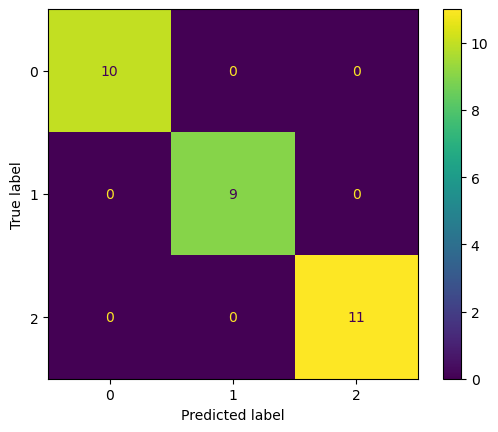

In [88]:
ConfusionMatrixDisplay.from_estimator(
    gs_clf.best_estimator_, test_features, test_labels)

plt.show()